In [15]:
#@markdown **Install Dependencies**

%%capture
!pip install diffusers transformers accelerate

In [16]:
#@markdown **Init model**

from diffusers import StableDiffusionPipeline
import torch

model_path = "AshrafAlAodat/text-to-sinogram-v1"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16).to("cuda")

In [17]:
#@markdown **Prompt && Generate Sinograms**

from skimage.transform import iradon_sart
from skimage.transform import radon, rescale
import numpy as np
from PIL import Image


prompt = "bat" #@param {type:"string"}

sinograms = pipe(prompt=prompt, num_images_per_prompt=4).images
reconstructions = list()
for sinogram in sinograms:
  sinogram = sinogram.convert("L")
  sinogram = np.array(sinogram)
  sinogram = rescale(sinogram, scale=0.4, mode='reflect')

  theta = np.linspace(0., 180., max(sinogram.shape), endpoint=False)
  reconstruction = iradon_sart(sinogram, theta=theta)
  reconstructions += [reconstruction]

  0%|          | 0/50 [00:00<?, ?it/s]

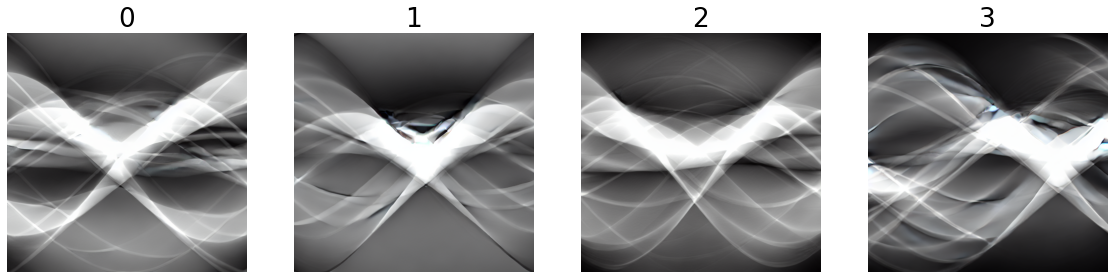

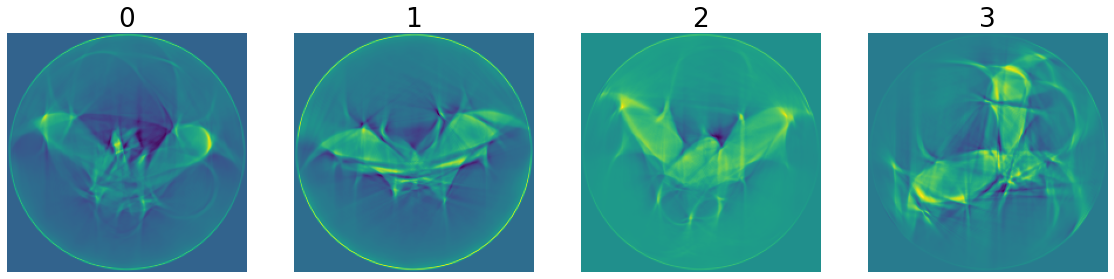

In [18]:
#@markdown **Plot Images**

import matplotlib.pyplot as plt

rows = 2
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(30, 10))
for num, image in enumerate(sinograms):
    plt.subplot(rows,6,num+1)
    plt.title(str(num))
    plt.axis('off')
    plt.imshow(image)

plt.figure(figsize=(30, 10))
for num, image in enumerate(reconstructions):
    plt.subplot(rows,6,num+1)
    plt.title(str(num))
    plt.axis('off')
    plt.imshow(image)